In [2]:
library(tidyverse)
# Run this cell before continuing.
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)

library(datateachr)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
set.seed = 4850


New names:
• `` -> `...1`
Rows: 607 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“The statistic is based on a difference or ratio; by default, for difference-based statistics, the explanatory variable is subtracted in the order "Data Scientist" - "Data Analyst", or divided in the order "Data Scientist" / "Data Analyst" for ratio-based statistics. To specify this order yourself, supply `order = c("Data Scientist", "Data Analyst")` to the calculate() function.”


[1] 15175.81

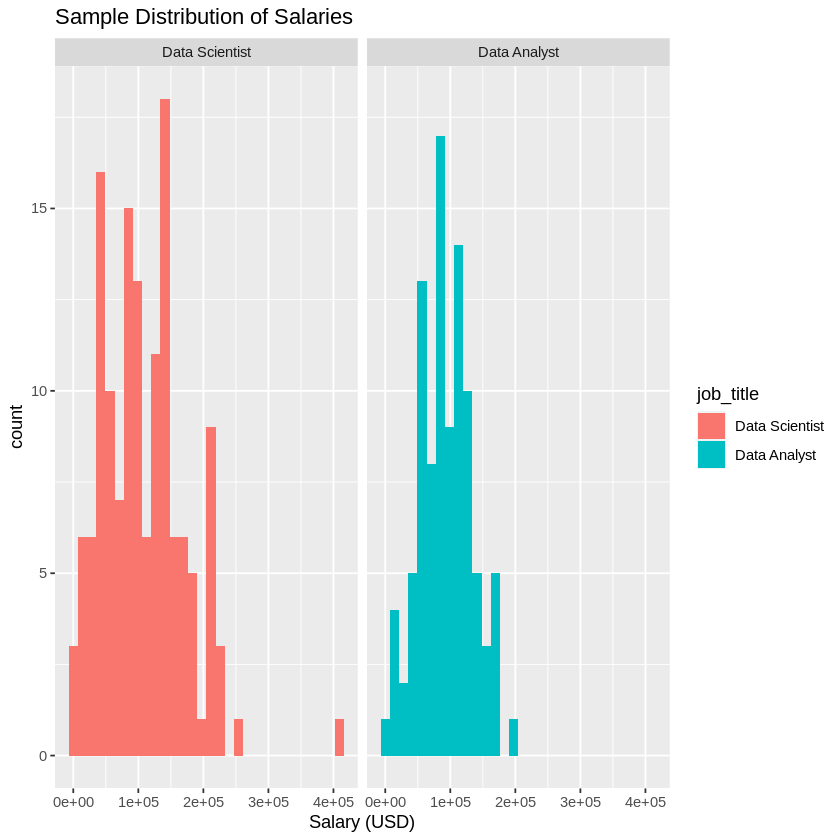

In [33]:
# read data file

data <- read_csv("data//ds_salaries.csv")

# clean up columns 

data <- data |>
    mutate(id = ...1) |>
    select(-...1) |>
    filter(!is.na(salary_in_usd), 
           # SHOULD WE KEEP CA?
           #employee_residence == "CA" &
           job_title == "Data Analyst" | job_title == "Data Scientist") |>
    mutate(job_title = as_factor(job_title))


# data


sample_dist <- data |>
    ggplot(aes(x = salary_in_usd, fill = job_title)) +
    geom_histogram() +
    facet_wrap(~ job_title) +
    ggtitle("Sample Distribution of Salaries") +
    xlab("Salary (USD)")

sample_dist

# generate bootstrap samples and find difference in means

samp_dist <- data |>
  specify(formula = salary_in_usd ~ job_title) %>% 
  # hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "bootstrap") %>% 
  calculate(stat = "diff in means")

# the testing value

obs_test_data <- mean(samp_dist$stat)

obs_test_data

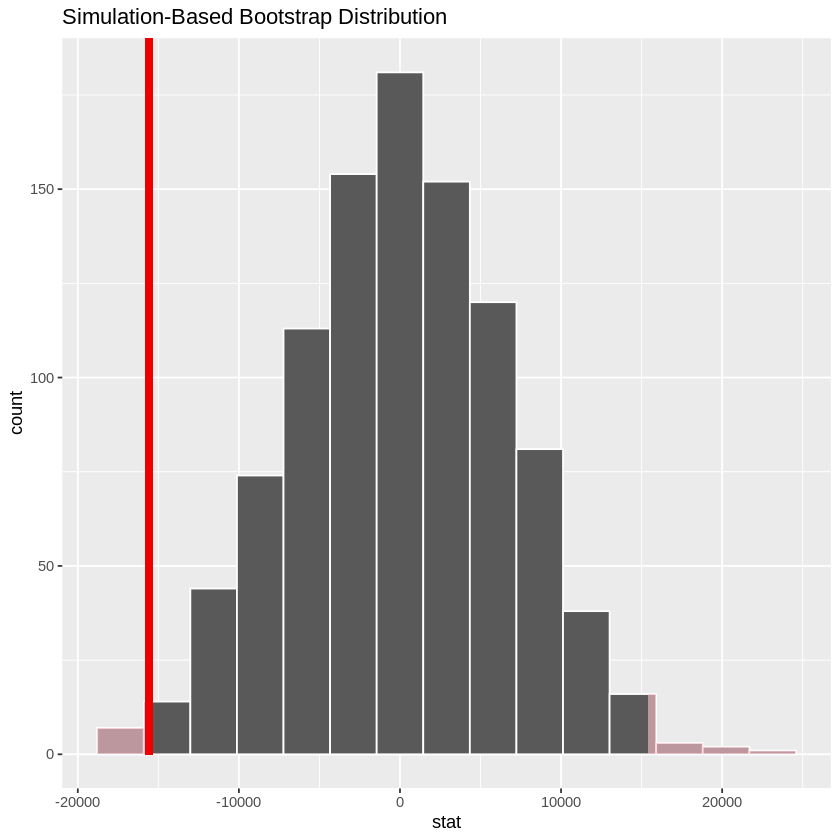

In [10]:
# shift sample distribution to make it a null distribution
null_dist <- samp_dist |>
  mutate(stat = stat + (0 - obs_test_data))

# graph distribution alongisde test value and shading

visualize(null_dist) +
    shade_p_value(obs_test_data, direction = 'two-sided')

In [11]:
null_dist |> get_p_value(obs_test_data, direction = 'two-sided')

p_value
<dbl>
0.016
